In [3]:
import pandas as pd
import numpy as np
from random import random
from math import exp
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [4]:
path = '/content/wheat-seeds.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
# normalising 
i=0
for col in df:
  if(i<7):
   df[col]= df[col]-df[col].min()/(df[col].max()-df[col].min())
   i+=1


In [7]:
df

,0,1,2,3,4,5,6,7
0,13.88,12.00595,-6.451931,2.795554,1.458445,0.918519,2.730988,1
1,13.29,11.52595,-6.428031,2.532554,1.462445,2.599519,2.599988,1
2,12.84,11.37595,-6.437531,2.565554,1.504445,2.159519,2.579988,1
3,15.14,12.42595,-6.429631,2.899554,1.687445,1.255519,2.949988,1
4,13.38,11.64595,-6.437931,2.627554,1.437445,2.362519,2.730988,1
...,...,...,...,...,...,...,...,...
205,10.23,10.31595,-6.481931,2.381554,0.920445,4.225519,2.777988,3
206,12.20,11.09595,-6.444731,2.477554,1.357445,8.215519,2.830988,3
207,10.84,10.64595,-6.480931,2.416554,0.961445,3.498519,2.818988,3
208,11.30,10.77595,-6.464631,2.484554,1.099445,5.537519,2.837988,3


In [8]:
df.shape

(210, 8)

In [9]:
df.head()

,0,1,2,3,4,5,6,7
0,13.88,12.00595,-6.451931,2.795554,1.458445,0.918519,2.730988,1
1,13.29,11.52595,-6.428031,2.532554,1.462445,2.599519,2.599988,1
2,12.84,11.37595,-6.437531,2.565554,1.504445,2.159519,2.579988,1
3,15.14,12.42595,-6.429631,2.899554,1.687445,1.255519,2.949988,1
4,13.38,11.64595,-6.437931,2.627554,1.437445,2.362519,2.730988,1


In [10]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [11]:
df['7'].value_counts()

3    70
2    70
1    70
Name: 7, dtype: int64

In [12]:
df['7']=df['7'].astype(int)-1

In [13]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7      int64
dtype: object

In [14]:
df['7'].value_counts()

2    70
1    70
0    70
Name: 7, dtype: int64

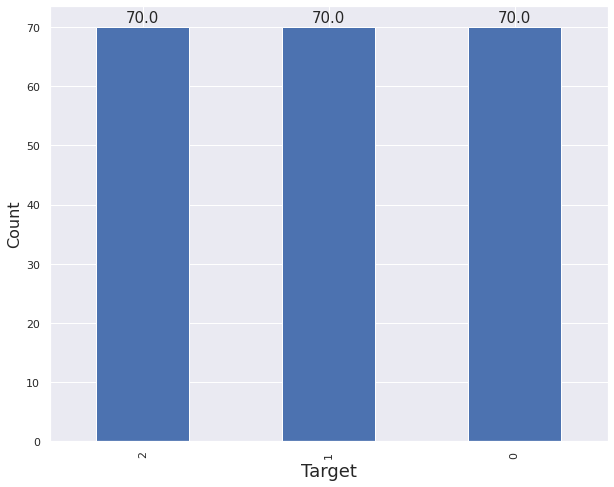

In [17]:
plt.rcParams["figure.figsize"] = (10, 8)
fig = plt.figure()
plt.xlabel('Target', fontsize=18)
plt.ylabel('Count', fontsize=16)
splot = df['7'].value_counts().plot.bar()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 15,
                   textcoords = 'offset points')

In [13]:
df.sample(frac=1)

,0,1,2,3,4,5,6,7
60,10.23,10.06595,-6.449031,2.143554,1.004445,2.169519,2.477988,0
81,19.20,14.32595,-6.443631,3.526554,1.989445,5.073519,3.961988,1
151,11.26,11.03595,-6.499731,2.649554,0.958445,4.656519,3.134988,2
106,16.63,13.29595,-6.453031,3.274554,1.698445,3.647519,3.703988,1
13,12.74,11.48595,-6.458631,2.723554,1.239445,2.832519,2.599988,0
...,...,...,...,...,...,...,...,...
203,11.37,10.90595,-6.476331,2.445554,1.085445,3.819519,2.775988,2
9,14.26,12.28595,-6.463431,2.955554,1.367445,4.443519,3.088988,0
93,17.36,13.95595,-6.487831,3.907554,1.610445,4.833519,4.222988,1
134,14.38,12.09595,-6.434031,2.718554,1.590445,3.500519,3.213988,1


In [14]:
rows= df.shape[0]

In [15]:
X=df.drop(['7'], axis=1)

In [16]:
y=df['7']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [18]:
train_df= X_train

In [19]:
train_df

,0,1,2,3,4,5,6
198,11.76,10.81595,-6.436631,2.314554,1.280445,2.728519,2.604988
56,13.92,11.86595,-6.432431,2.625554,1.537445,1.042519,2.862988
180,11.46,10.84595,-6.462431,2.477554,1.142445,4.887519,2.921988
55,13.46,11.78595,-6.451231,2.629554,1.502445,2.702519,2.818988
208,11.30,10.77595,-6.464631,2.484554,1.099445,5.537519,2.837988
...,...,...,...,...,...,...,...
203,11.37,10.90595,-6.476331,2.445554,1.085445,3.819519,2.775988
137,14.60,12.54595,-6.475031,3.073554,1.411445,2.625519,3.526988
72,18.11,13.69595,-6.424931,3.395554,2.055445,2.836519,3.853988
140,12.32,11.37595,-6.471731,2.782554,1.198445,6.935519,3.214988


In [20]:
y_train

198    2
56     0
180    2
55     0
208    2
      ..
203    2
137    1
72     1
140    2
37     0
Name: 7, Length: 147, dtype: int64

In [21]:
y_test

44     0
188    2
51     0
204    2
35     0
      ..
19     0
194    2
90     1
39     0
116    1
Name: 7, Length: 63, dtype: int64

In [22]:
X_train

,0,1,2,3,4,5,6
198,11.76,10.81595,-6.436631,2.314554,1.280445,2.728519,2.604988
56,13.92,11.86595,-6.432431,2.625554,1.537445,1.042519,2.862988
180,11.46,10.84595,-6.462431,2.477554,1.142445,4.887519,2.921988
55,13.46,11.78595,-6.451231,2.629554,1.502445,2.702519,2.818988
208,11.30,10.77595,-6.464631,2.484554,1.099445,5.537519,2.837988
...,...,...,...,...,...,...,...
203,11.37,10.90595,-6.476331,2.445554,1.085445,3.819519,2.775988
137,14.60,12.54595,-6.475031,3.073554,1.411445,2.625519,3.526988
72,18.11,13.69595,-6.424931,3.395554,2.055445,2.836519,3.853988
140,12.32,11.37595,-6.471731,2.782554,1.198445,6.935519,3.214988


In [23]:
train_df= X_train

In [24]:
train_df['7']=y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_df_ar= train_df.to_numpy()

In [26]:
test_df= X_test
test_df['7']=y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
test_df

,0,1,2,3,4,5,6,7
44,12.80,11.47595,-6.453631,2.617554,1.280445,1.460519,2.735988,0
188,9.59,9.84595,-6.468231,2.140554,0.912445,4.875519,2.568988,2
51,13.49,12.04595,-6.479231,2.956554,1.238445,4.016519,3.170988,0
204,11.19,10.63595,-6.454731,2.378554,1.106445,3.531519,2.644988,2
35,15.20,12.70595,-6.459631,3.067554,1.589445,2.723519,3.301988,0
...,...,...,...,...,...,...,...,...
19,13.16,11.83595,-6.474631,2.899554,1.254445,2.972519,2.950988,0
194,11.80,10.90595,-6.447031,2.401554,1.251445,4.773519,2.688988,2
90,17.76,13.63595,-6.434631,3.413554,1.921445,3.020519,3.827988,1
39,12.54,11.28595,-6.445931,2.589554,1.281445,2.487519,2.952988,0


In [28]:
test_df_ar= test_df.to_numpy()

# 1. MLP From scratch

In [29]:
  loss_value_scratch=[]

In [30]:
def init_net(n_inputs, n_outputs, hidden):
  network=[]
  feed= n_inputs
  for neuron in hidden:
    hid_layer = [{'wts':[random() for i in range(feed+1)]} for i in range(neuron)]
    network.append(hid_layer)
    feed= neuron
  out_layer = [{'wts':[random() for i in range(feed+1)]} for i in range(n_outputs)]
  network.append(out_layer)
  return network

In [31]:
def activate(wts, input):
 out= wts[-1]
 for i in range (len(wts)-1):
   out= out + wts[i]* input[i]
 return out

In [32]:
def sigmoid(out):
  sigm_out= 1.0 / (1.0 +exp((-1) * out))
  return sigm_out

In [33]:
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inp=[]
    for neuron in layer:
      out=activate(neuron['wts'],inputs)
      neuron['out']= sigmoid(out)
      new_inp.append(neuron['out'])
    inputs= new_inp
  return inputs
    

In [34]:
def sigm_der(out):
  return out* (1.0 -out)

In [35]:
def back_prop_error(network, expected):
  for i in reversed(range(len(network))):
    layer= network[i]
    errors=[]
    if(i!=len(network)-1):
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i+1]:
          error= error+neuron['wts'][j]* neuron['del']
        errors.append(error)
    else :
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j]-neuron['out'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['del']= errors[j]*sigm_der(neuron['out'])

In [36]:
# Update network weights with error
def update_weights(network, row, l_rate):
  for i in range(len(network)):
   inputs = row[:-1]
   if i != 0:
     inputs = [neuron['out'] for neuron in network[i - 1]]
   for neuron in network[i]:
     for j in range(len(inputs)):
       neuron['wts'][j] = neuron['wts'][j]+ l_rate * neuron['del'] * inputs[j]
     neuron['wts'][-1] = neuron['wts'][-1]+ l_rate * neuron['del']

In [37]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))

In [38]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
 for epoch in range(n_epoch):
   sum_error = 0
   for row in train:
     outputs = forward_propagate(network, row)
     expected = [0 for i in range(n_outputs)]
     expected[row[-1].astype(int)-1] = 1
     sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
     back_prop_error(network, expected)
     update_weights(network, row, l_rate)
   loss_value_scratch.append(sum_error/len(train))
   print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error/len(train)))

In [39]:
def back_propagation(train, test, l_rate, n_epoch, hidden):
 n_inputs = len(train[0]) - 1
 n_outputs = len(set([row[-1] for row in train]))
 network = init_net(n_inputs, n_outputs, hidden)
 train_network(network, train, l_rate, n_epoch, n_outputs)
 predictions =[]
 for row in test:
  prediction = predict(network, row)
  predictions.append(prediction)
 return(predictions)

In [40]:
def find_accuracy(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [41]:
def test_network(train_data, test_data, n_epoch, l_rate, hidden):
  predicted= back_propagation(train_data, test_data, l_rate, n_epoch, hidden)
  actual = [row[-1] for row in test_data]
  accuracy = find_accuracy(actual, predicted)
  return accuracy


In [42]:
acc= test_network(train_df_ar, test_df_ar, 500, 0.5, [20])
print(acc)

epoch=0, lrate=0.500, error=2.000
epoch=1, lrate=0.500, error=2.000
epoch=2, lrate=0.500, error=1.999
epoch=3, lrate=0.500, error=1.999
epoch=4, lrate=0.500, error=1.814
epoch=5, lrate=0.500, error=1.640
epoch=6, lrate=0.500, error=1.639
epoch=7, lrate=0.500, error=1.630
epoch=8, lrate=0.500, error=1.619
epoch=9, lrate=0.500, error=1.599
epoch=10, lrate=0.500, error=1.622
epoch=11, lrate=0.500, error=1.570
epoch=12, lrate=0.500, error=1.603
epoch=13, lrate=0.500, error=1.614
epoch=14, lrate=0.500, error=1.638
epoch=15, lrate=0.500, error=1.635
epoch=16, lrate=0.500, error=1.629
epoch=17, lrate=0.500, error=1.619
epoch=18, lrate=0.500, error=1.589
epoch=19, lrate=0.500, error=1.597
epoch=20, lrate=0.500, error=1.577
epoch=21, lrate=0.500, error=1.580
epoch=22, lrate=0.500, error=1.578
epoch=23, lrate=0.500, error=1.616
epoch=24, lrate=0.500, error=1.482
epoch=25, lrate=0.500, error=1.019
epoch=26, lrate=0.500, error=0.759
epoch=27, lrate=0.500, error=0.757
epoch=28, lrate=0.500, error=0

In [43]:
loss_value_scratch

[1.9996336838233166,
 1.9995220885677707,
 1.9992937784667575,
 1.9985215276436508,
 1.8140748800147617,
 1.6403699169170287,
 1.6385372329091485,
 1.6300818957051797,
 1.6187949749454937,
 1.5986496132367038,
 1.6220147090300239,
 1.5695666427172739,
 1.6027775284810903,
 1.613865354274999,
 1.6377514951399508,
 1.6353459487775401,
 1.6294171197800456,
 1.619374581180786,
 1.5888086376213786,
 1.5971470144273834,
 1.5765888538901476,
 1.579559153426059,
 1.5776500299860745,
 1.6162846803333515,
 1.482207661893613,
 1.0188446942783689,
 0.7585601441005925,
 0.7571994011006355,
 0.7781121671824622,
 0.7362694781419818,
 0.8106782699077156,
 0.8106671278514221,
 0.8106359905494638,
 0.783566755432251,
 0.717412945979205,
 0.688794409597166,
 0.806186423499968,
 0.7220138894685301,
 0.7722297920678732,
 0.8106135364036647,
 0.7683997870029006,
 0.8031199746954626,
 0.8105568972724877,
 0.7860290797067975,
 0.665491073456233,
 0.8036676857594378,
 0.8036670187051826,
 0.8036662652998339,
 

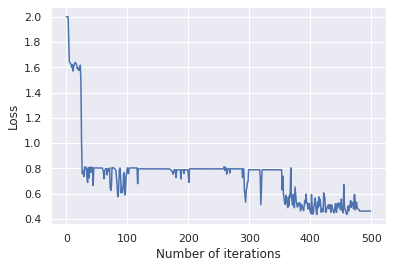

In [44]:
plt.plot(loss_value_scratch)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# MLP Using sklearn

In [45]:
clf = MLPClassifier(hidden_layer_sizes=(20,), random_state=1,max_iter=500,activation='logistic',solver='sgd',power_t=0, tol=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0, random_state=1, shuffle=True, solver='sgd', tol=0,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
clf.score(X_test, y_test)

0.9523809523809523

In [48]:
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred) * 100.
loss_values = clf.loss_curve_
print (loss_values)

[1.1837400549706147, 1.182622135418353, 1.1810417101195119, 1.1790594651079576, 1.1767328715108472, 1.1741159545430402, 1.171259148963945, 1.168209213266592, 1.1650091869159647, 1.1616983830825736, 1.1583124142980687, 1.154883250944923, 1.1514393130843117, 1.148005595407476, 1.1446038236211589, 1.1412526388451218, 1.1379678050121387, 1.13476243309725, 1.1316472154077664, 1.1286306631594811, 1.1257193410727173, 1.1229180936106122, 1.1202302585957893, 1.1176578651329614, 1.1152018139146975, 1.1128620390128792, 1.1106376511134783, 1.1085270628223518, 1.1065280971622613, 1.1046380807173024, 1.1028539230870558, 1.1011721844158688, 1.099589132786121, 1.0981007932263613, 1.0967029899990723, 1.0953913837073745, 1.094161504601454, 1.0930087832788256, 1.0919285797630034, 1.090916211719207, 1.0899669823316342, 1.0890762081343583, 1.0882392468679063, 1.0874515252369, 1.086708566280519, 1.0860060159446139, 1.0853396683666303, 1.0847054893533001, 1.0840996375439875, 1.0835184828042723, 1.08295862147

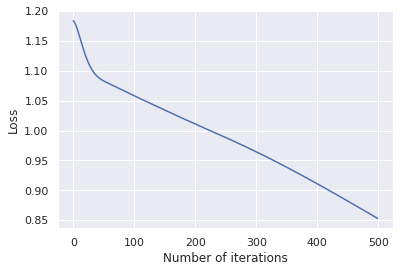

In [49]:
plt.plot(loss_values)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# 2. K-means clustering from scratch

In [50]:
path2 = '/content/Mall_Customers.csv'

In [51]:
df2 = pd.read_csv(path2)

In [52]:
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


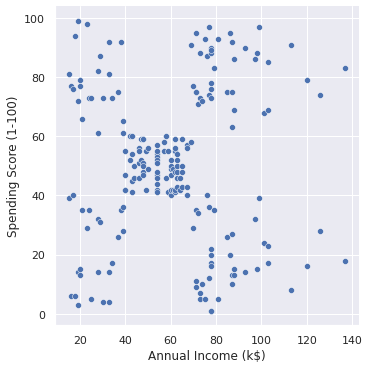

In [53]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df2);

In [54]:
data = df2[["Annual Income (k$)","Spending Score (1-100)"]]

In [55]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [56]:
import random
def init_centroids(n_clusters):
 ind = random.sample(range(0, len(data)), n_clusters)
 centroids = []
 for i in ind:
    centroids.append(data.loc[i])
 centroids = np.array(centroids)
 return centroids

In [57]:
def calc_distance(x1, x2):
    return(sum((x1 - x2)**2))**0.5

In [58]:
def findClosestCentroids(centroid, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in centroid:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [59]:
data_ar = np.array(data)

In [60]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [61]:
def show_clusters(n_clusters):
 centroids= init_centroids(n_clusters)
 for i in range(10):
    get_centroids = findClosestCentroids(centroids, data_ar)
    centroids = calc_centroids(get_centroids, data_ar)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(data_ar[:, 0], data_ar[:, 1], alpha=0.1)
    plt.show()

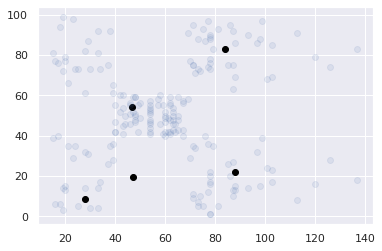

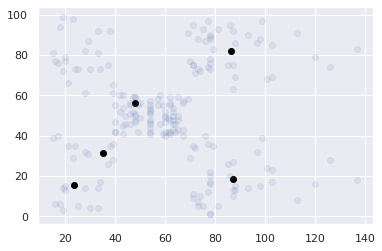

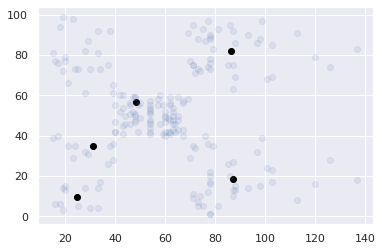

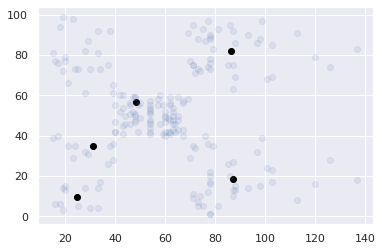

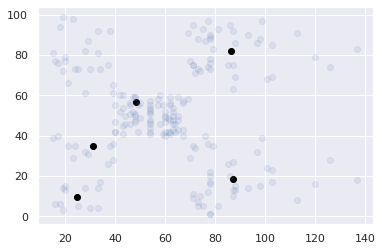

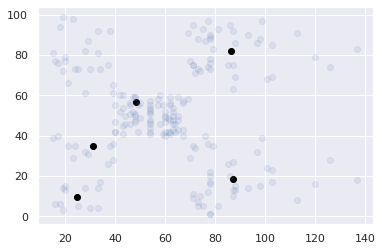

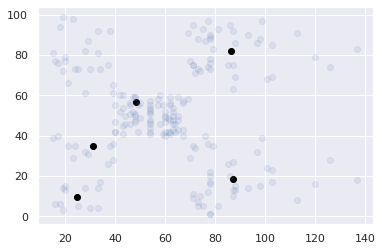

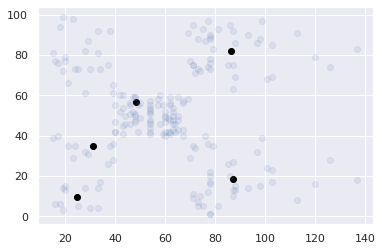

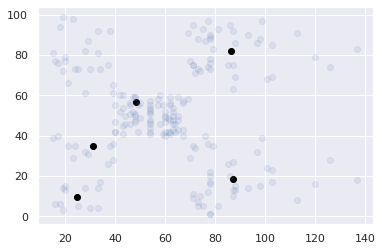

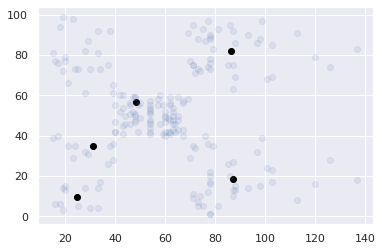

In [62]:
show_clusters(5)

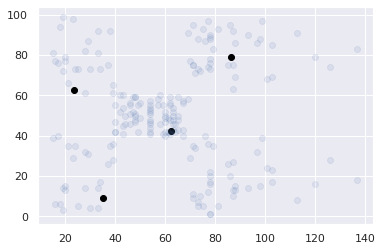

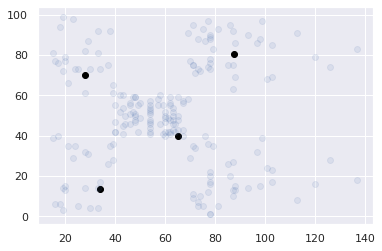

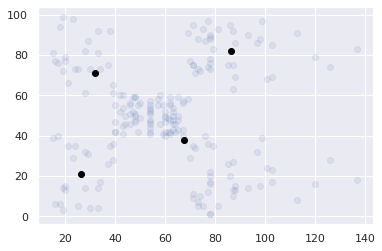

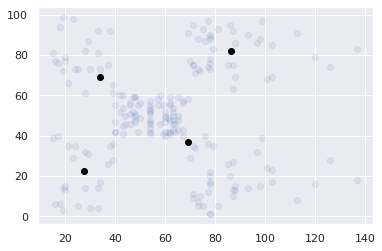

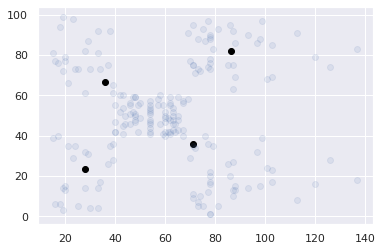

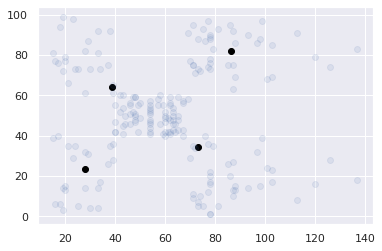

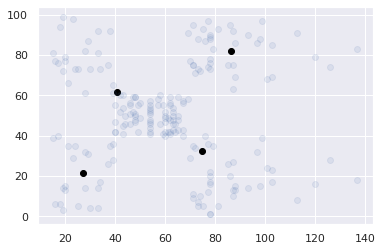

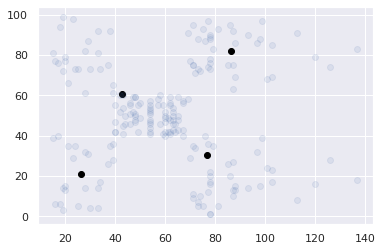

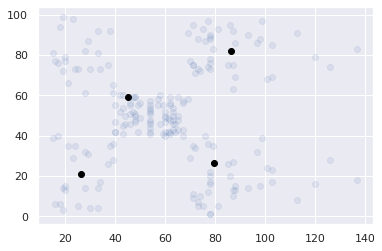

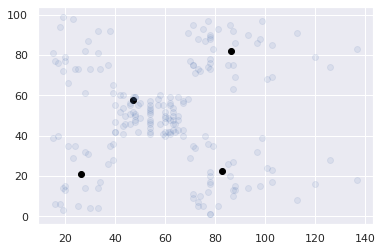

In [63]:
show_clusters(4)

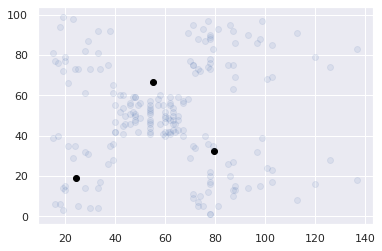

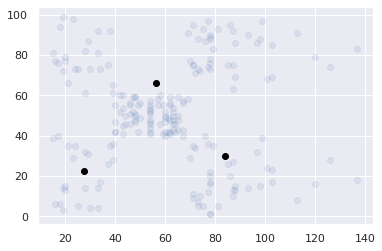

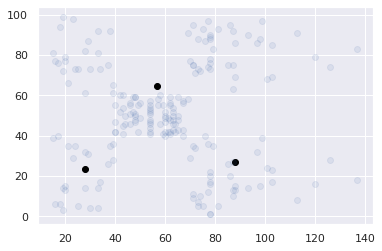

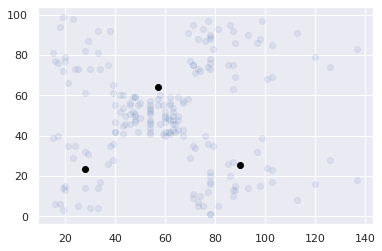

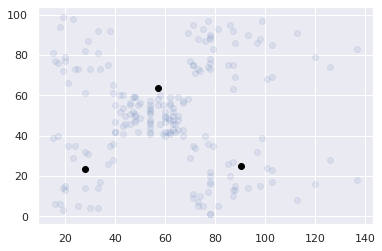

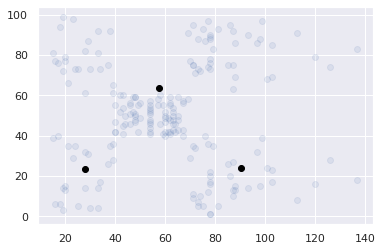

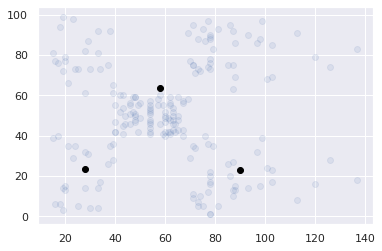

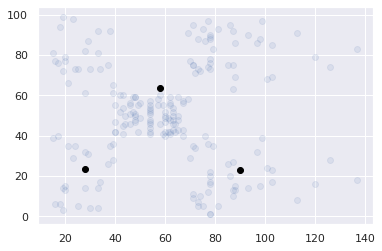

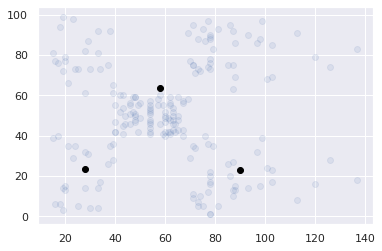

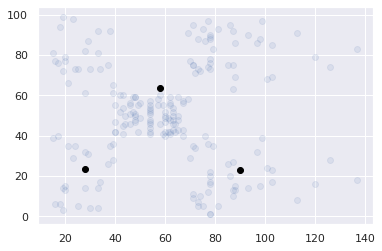

In [64]:
show_clusters(3)

# K-means using sklearn

In [65]:
def k_means_sklearn(n_clusters):
 kmeans = KMeans(n_clusters, random_state=0)
 kmeans.fit(data_ar)
 print(kmeans.cluster_centers_)
 print(kmeans.labels_)
 plt.scatter(data_ar[:,0],data_ar[:,1], c=kmeans.labels_, cmap='rainbow')
 plt.scatter(np.array(kmeans.cluster_centers_)[:, 0], np.array(kmeans.cluster_centers_)[:, 1],s=100, color='black')

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]
[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


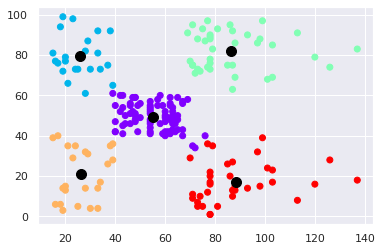

In [66]:
k_means_sklearn(5)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [48.26       56.48      ]]
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


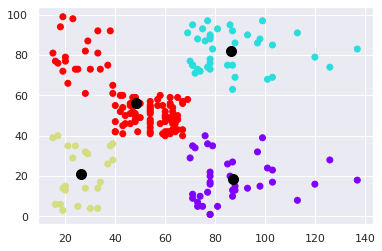

In [67]:
k_means_sklearn(4)

[[44.15447154 49.82926829]
 [86.53846154 82.12820513]
 [87.         18.63157895]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


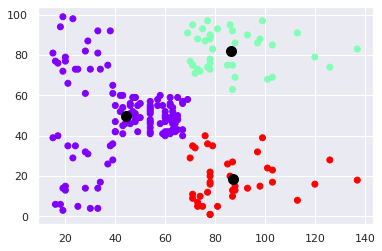

In [68]:
k_means_sklearn(3)

In [69]:
# reference(data) : https://www.kaggle.com/shwetabh123/mall-customers

SyntaxError: ignored